# Preprocessing of training data

In [2]:
import numpy as np
import matplotlib.pylab as plt
import os
import cv2

DATADIR = "/Users/benjamincorvera/Datasets/PetImages"
CATEGORIES = ["DOG", "CAT"]

for category in CATEGORIES:
    path = os.path.join(DATADIR, category)  # path to cats or dog dir
    for img in os.listdir(path):
        img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
        # plt.imshow(img_array,cmap='gray')
        # plt.show()

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


In [2]:
print(img_array.shape)

(500, 436)


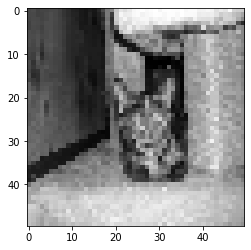

In [3]:
IMG_SIZE = 50

new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
plt.imshow(new_array, cmap="gray")
plt.show()

In [4]:
training_data = []

# iterate through data set and
def create_training_data():
    for category in CATEGORIES:
        path = os.path.join(DATADIR, category)  # path to cats or dog dir
        class_num = CATEGORIES.index(category)  # 0 for dog, 1 in cat
        for img in os.listdir(path):
            try:
                img_array = cv2.imread(os.path.join(path, img), cv2.IMREAD_GRAYSCALE)
                new_array = cv2.resize(img_array, (IMG_SIZE, IMG_SIZE))
                training_data.append(
                    (new_array, class_num)
                )  # used tuple instead of list
            except Exception as e:
                pass


create_training_data()

Corrupt JPEG data: 65 extraneous bytes before marker 0xd9
Corrupt JPEG data: 226 extraneous bytes before marker 0xd9
Corrupt JPEG data: 162 extraneous bytes before marker 0xd9
Corrupt JPEG data: 2230 extraneous bytes before marker 0xd9
Corrupt JPEG data: 254 extraneous bytes before marker 0xd9
Corrupt JPEG data: 399 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1403 extraneous bytes before marker 0xd9
Corrupt JPEG data: 214 extraneous bytes before marker 0xd9
Corrupt JPEG data: 1153 extraneous bytes before marker 0xd9
Corrupt JPEG data: 99 extraneous bytes before marker 0xd9
Corrupt JPEG data: 128 extraneous bytes before marker 0xd9
Corrupt JPEG data: 239 extraneous bytes before marker 0xd9


In [5]:
print(len([data for data in training_data if data[1] == 1]))  # number of dogs
print(len([data for data in training_data if data[1] == 0]))  # number of cats


# for classification it is very important to have a balanced dataset (more or less 50%/50% cat and dog images)
# otherwise the nn will learn to predict dog every time

12476
12470


In [6]:
# it also need to be SHUFFELED
# otherwise the nn will learn to always predict dog, then always predict category

import random

random.shuffle(training_data)

In [7]:
for sample in training_data[:10]:
    print(sample[1])

0
0
0
0
1
0
0
1
1
0


In [8]:
X = []
y = []

for features,label in training_data:
    X.append(features)
    y.append(label)

In [9]:
X = np.array(X).reshape(-1, IMG_SIZE, IMG_SIZE, 1)
# -1 is a catch all for how many features
# 1 is for grayscale
# y can stay as a list

[[[[201]
   [185]
   [178]
   ...
   [223]
   [228]
   [203]]

  [[178]
   [189]
   [160]
   ...
   [208]
   [216]
   [192]]

  [[197]
   [148]
   [147]
   ...
   [192]
   [216]
   [157]]

  ...

  [[147]
   [180]
   [174]
   ...
   [134]
   [130]
   [150]]

  [[145]
   [137]
   [184]
   ...
   [196]
   [141]
   [191]]

  [[169]
   [113]
   [180]
   ...
   [155]
   [153]
   [172]]]


 [[[141]
   [142]
   [142]
   ...
   [ 60]
   [ 65]
   [ 63]]

  [[145]
   [132]
   [107]
   ...
   [ 74]
   [ 83]
   [ 82]]

  [[147]
   [144]
   [131]
   ...
   [ 85]
   [ 87]
   [ 88]]

  ...

  [[112]
   [112]
   [111]
   ...
   [ 83]
   [ 78]
   [ 75]]

  [[111]
   [110]
   [110]
   ...
   [ 83]
   [ 79]
   [ 76]]

  [[121]
   [108]
   [109]
   ...
   [ 80]
   [ 76]
   [ 72]]]


 [[[167]
   [168]
   [173]
   ...
   [130]
   [155]
   [141]]

  [[173]
   [177]
   [175]
   ...
   [140]
   [149]
   [137]]

  [[178]
   [181]
   [177]
   ...
   [160]
   [145]
   [143]]

  ...

  [[132]
   [130]
   [130]
   

In [10]:
import pickle

pickle_out = open("X.pickle", "wb")
pickle.dump(X, pickle_out)
pickle_out.close()
pickle_out = open("y.pickle", "wb")
pickle.dump(y, pickle_out)
pickle_out.close()